In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
import re
import os
import pandas as pd
warnings.simplefilter('ignore')

In [2]:
df_logging = pd.read_csv("Logging_with_topics.csv")

In [3]:
df_logging = df_logging[["Title","Body","document","dominant_topic"]]
df_logging

,Title,Body,document,dominant_topic
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...,7
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...,5
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...,7
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...,1
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...,5
...,...,...,...,...
75986,zerolog with stdout and file logger adds addit...,<p>I am using <code>zerolog</code> package in ...,zerolog stdout file logger add additional mess...,5
75987,How do I test that zerolog logger raised log e...,<p>In my Go app I moved error logging into a s...,test zerolog logger raised log event type erro...,5
75988,Change position level and timestamp zerolog go...,<p>i'm using zerolog for logging and got compl...,change position level timestamp zerolog golang...,5
75989,How to extract the zerolog event fields in the...,<p>I wrote a code for integrating Azure app in...,extract zerolog event field hook wrote code in...,7


In [4]:
df_logging = df_logging.drop_duplicates()
df_logging

,Title,Body,document,dominant_topic
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...,7
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...,5
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...,7
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...,1
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...,5
...,...,...,...,...
75986,zerolog with stdout and file logger adds addit...,<p>I am using <code>zerolog</code> package in ...,zerolog stdout file logger add additional mess...,5
75987,How do I test that zerolog logger raised log e...,<p>In my Go app I moved error logging into a s...,test zerolog logger raised log event type erro...,5
75988,Change position level and timestamp zerolog go...,<p>i'm using zerolog for logging and got compl...,change position level timestamp zerolog golang...,5
75989,How to extract the zerolog event fields in the...,<p>I wrote a code for integrating Azure app in...,extract zerolog event field hook wrote code in...,7


In [5]:
df_concatenate_csv = pd.read_csv('Library\combined_output.csv')
df_concatenate_csv

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,68798737,1,68804208.0,NaN,2021-08-16 07:13:10,NaN,0,396.0,<p>How do I get args like epochs to show up in...,15418028.0,...,NaN,2021-08-16 14:06:01,ClearML How to get configurable hyperparameters?,<devops><mlops><clearml><trains>,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0
1,69127220,1,NaN,NaN,2021-09-10 04:19:25,NaN,0,534.0,<p>I am using clearml for testing algorithms a...,16875317.0,...,NaN,2022-04-17 13:11:16,how to capture logger values using clearml,<python><pytorch><clearml>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
2,69642600,1,NaN,NaN,2021-10-20 08:22:15,NaN,1,641.0,<p>I'm trying to install Comet ML version <cod...,3165451.0,...,NaN,2021-10-20 08:22:15,Conda UnsatisfiableError of glibc when trying ...,<python><docker><glibc><anaconda3><comet-ml>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,70397010,1,70446195.0,NaN,2021-12-17 17:49:10,NaN,2,1052.0,<p>I've set up a ClearML server in GCP using t...,14277911.0,...,NaN,2021-12-22 08:33:57,What would stop credentials from validation on...,<clearml>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
4,70423979,1,NaN,NaN,2021-12-20 15:16:30,NaN,0,275.0,<p>Are there any metrics I can get from the AP...,12100504.0,...,NaN,2022-04-17 13:01:09,Export metrics of ClearML to Prometheus and sh...,<prometheus><grafana><metrics><clearml>,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97204,77823971,1,77824252.0,NaN,2024-01-16 07:06:56,NaN,1,528.0,<p>i'm using zerolog for logging and got compl...,10262783.0,...,2024-01-16 10:17:16,2024-01-16 10:17:16,Change position level and timestamp zerolog go...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
97205,77824746,1,NaN,NaN,2024-01-16 09:41:57,NaN,2,471.0,<p>I wrote a code for integrating Azure app in...,9435629.0,...,NaN,2024-01-16 13:10:56,How to extract the zerolog event fields in the...,<azure><go><azure-application-insights><distri...,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0
97206,78256467,1,NaN,NaN,2024-04-01 15:57:44,NaN,1,141.0,<p>I use Zerolog for logging some JSON strings...,11289618.0,...,NaN,2024-04-01 15:57:44,Disable escaping in Zerolog or limit max log's...,<go><logging><zerolog>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
97207,78297352,1,NaN,NaN,2024-04-09 09:11:09,NaN,1,53.0,<p>I use Zerolog and Lumberjack to create logs...,23358934.0,...,2024-04-09 09:29:32,2024-04-09 09:29:32,How can I manage the auto incrementation of an...,<go><logging><zerolog>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0


In [6]:
df_traditional = pd.read_csv("TagsLogging.csv")
df_traditional

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,NaN,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0,0,NaN,NaN,NaN,CC BY-SA 4.0
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17,<p>I have one Java class that is multithreaded...,2395365.0,...,NaN,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0,2,NaN,NaN,NaN,CC BY-SA 4.0
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,NaN,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0,2,NaN,NaN,NaN,CC BY-SA 4.0
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24,<p>I want to be able to set python logging lev...,17285857.0,...,NaN,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44733,8715,1,NaN,NaN,2008-08-12 12:01:01,NaN,6,1099,<p>Jeff mentioned in one of the podcasts that ...,908.0,...,2008-09-05 13:10:05,2010-05-25 19:18:02,Instrumenting Database Access,<database><logging><instrumentation>,7,0,NaN,NaN,NaN,CC BY-SA 2.5
44734,6530,1,6534.0,NaN,2008-08-09 02:03:52,NaN,11,4853,<p>I have a ASP.NET application that we've wri...,233.0,...,2012-05-03 07:40:22,2013-02-13 06:04:34,Where should I put my log file for an asp.net ...,<asp.net><logging><permissions>,6,0,NaN,NaN,NaN,CC BY-SA 3.0
44735,5908,1,5914.0,NaN,2008-08-08 13:34:38,NaN,7,21086,<p>I need to get a log of user access to our <...,71.0,...,2011-10-11 08:30:32,2011-10-11 08:30:32,User access log to SQL Server,<sql-server><logging><statistics>,2,0,NaN,NaN,NaN,CC BY-SA 3.0
44736,4541,1,106093.0,NaN,2008-08-07 08:58:18,NaN,5,1581,<p>To analyze lots of text logs I did some hac...,501.0,...,2015-04-30 09:43:19,2015-04-30 09:43:19,Simple MOLAP solution,<database><logging><text-files><olap>,4,0,NaN,NaN,NaN,CC BY-SA 3.0


In [7]:
df_traditional_ = pd.read_csv("TitleLogging.csv")
df_traditional_

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,16490951,1,16650917.0,NaN,2013-05-10 21:17:00,NaN,1,5794,<p>I've been looking around for documentation ...,773332.0,...,NaN,2013-05-20 13:44:37,Enterprise Library logging to filter by catego...,<c#><logging><enterprise-library>,1,0,NaN,NaN,NaN,CC BY-SA 3.0
1,16492621,1,16723425.0,NaN,2013-05-11 00:36:40,NaN,2,3375,<p>I'm loading my logging configuration from a...,1044422.0,...,2013-05-11 12:48:18,2013-05-23 20:35:13,Python logging not working,<python><logging>,2,2,NaN,NaN,NaN,CC BY-SA 3.0
2,16493163,1,NaN,NaN,2013-05-11 02:28:14,NaN,2,1890,<p>I have a django application running. \nThe ...,1629366.0,...,2013-05-11 02:44:21,2013-05-11 03:22:28,master slave postgresql with logging and monit...,<python><django><postgresql><database-administ...,1,0,NaN,NaN,NaN,CC BY-SA 3.0
3,16494201,1,16722711.0,NaN,2013-05-11 05:46:51,NaN,0,957,"<p>It seems that by default, Silex is logging ...",54522.0,...,NaN,2015-07-27 08:38:50,Preventing default error logging in Silex,<php><symfony><silex>,2,2,NaN,NaN,NaN,CC BY-SA 3.0
4,16494722,1,16497954.0,NaN,2013-05-11 07:08:37,NaN,1,3032,<p>i am currently try to configure centralized...,1969793.0,...,2013-05-12 19:06:09,2013-05-12 19:06:09,Jetty 8 centralize logging with slf4j,<logging><jetty><slf4j><logback>,1,0,NaN,NaN,NaN,CC BY-SA 3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,65423970,1,65426067.0,NaN,2020-12-23 12:00:36,NaN,3,245,<p>There is a lot of logging in my C++ project...,23715.0,...,NaN,2020-12-25 12:45:17,Hide/fold/dim arbitrary lines of code by regex...,<c++><visual-studio-code>,1,3,NaN,NaN,NaN,CC BY-SA 4.0
14996,74141896,1,NaN,NaN,2022-10-20 14:49:12,NaN,1,100,<p>It seems Chrome has a feature where it rest...,4901390.0,...,2022-10-20 15:16:56,2022-10-21 14:15:16,Prevent Chrome from restoring form inputs on t...,<javascript><google-chrome><session>,0,0,NaN,NaN,NaN,CC BY-SA 4.0
14997,74155189,1,74244561.0,NaN,2022-10-21 14:27:47,NaN,4,2236,<p><strong>What is the standard way to log unc...,1422096.0,...,2022-10-24 09:02:06,2022-10-31 08:12:16,How to log uncaught exceptions in Flask routes...,<python><flask><logging><python-logging>,4,5,NaN,NaN,NaN,CC BY-SA 4.0
14998,52390345,1,52392924.0,NaN,2018-09-18 15:49:54,NaN,0,264,<p>I would like to know if there is a proper w...,8569490.0,...,NaN,2018-09-18 18:52:43,How to define database variable for logging in...,<kettle><pentaho-data-integration><spoon>,1,0,NaN,NaN,NaN,CC BY-SA 4.0


In [8]:
df_logging_ = pd.concat([df_traditional, df_traditional_, df_concatenate_csv], axis=0)
df_logging_ = df_logging_.drop_duplicates()
df_logging_

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7.0,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,NaN,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0.0,0,NaN,NaN,NaN,CC BY-SA 4.0
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17.0,<p>I have one Java class that is multithreaded...,2395365.0,...,NaN,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10.0,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,NaN,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23.0,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24.0,<p>I want to be able to set python logging lev...,17285857.0,...,NaN,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1.0,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32603,73730972,1,73732340.0,NaN,2022-09-15 12:15:29,NaN,6,5052.0,<p>I am using <code>zerolog</code> package in ...,974155.0,...,NaN,2022-09-15 13:48:18,zerolog with stdout and file logger adds addit...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32607,76851520,1,76851955.0,NaN,2023-08-07 12:04:59,NaN,4,2112.0,<p>In my Go app I moved error logging into a s...,19698303.0,...,2023-08-07 14:56:43,2023-08-24 05:50:16,How do I test that zerolog logger raised log e...,<unit-testing><go><zerolog>,2.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32610,77823971,1,77824252.0,NaN,2024-01-16 07:06:56,NaN,1,528.0,<p>i'm using zerolog for logging and got compl...,10262783.0,...,2024-01-16 10:17:16,2024-01-16 10:17:16,Change position level and timestamp zerolog go...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32611,77824746,1,NaN,NaN,2024-01-16 09:41:57,NaN,2,471.0,<p>I wrote a code for integrating Azure app in...,9435629.0,...,NaN,2024-01-16 13:10:56,How to extract the zerolog event fields in the...,<azure><go><azure-application-insights><distri...,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0


In [9]:
df_logging = df_logging.dropna()

In [10]:
def assign_topic_names(df, topic_mapping):
    # Map the 'dominant_topic' to 'topic_name' using the provided dictionary
    df['dominant_topic'] = pd.to_numeric(df['dominant_topic'], errors='coerce')
    df = df.dropna(subset=['dominant_topic'])
    df['dominant_topic'] = df['dominant_topic'].astype(int)
    df['topic_name'] = df['dominant_topic'].map(topic_mapping)
    return df

In [11]:
topic_mapping = {
    0: "Testing and CI Pipelines",
    1: "Error Handling and Debugging",
    2: "Event Logging and Monitoring",
    3: "File Logging and Configuration",
    4: "NLog and .NET Logging",
    5: "Logging Levels and Output",
    6: "Logging in Containerized Environments",
    7: "Custom Logging Frameworks",
    8: "Data and Tensorboard Logging",
    9: "Logback and Application Configuration",
    10: "General Logging Practices"
}

# Add the topic names to the DataFrame
df_logging = assign_topic_names(df_logging, topic_mapping)
df_logging

,Title,Body,document,dominant_topic,topic_name
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...,7,Custom Logging Frameworks
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...,5,Logging Levels and Output
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...,7,Custom Logging Frameworks
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...,1,Error Handling and Debugging
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...,5,Logging Levels and Output
...,...,...,...,...,...
75986,zerolog with stdout and file logger adds addit...,<p>I am using <code>zerolog</code> package in ...,zerolog stdout file logger add additional mess...,5,Logging Levels and Output
75987,How do I test that zerolog logger raised log e...,<p>In my Go app I moved error logging into a s...,test zerolog logger raised log event type erro...,5,Logging Levels and Output
75988,Change position level and timestamp zerolog go...,<p>i'm using zerolog for logging and got compl...,change position level timestamp zerolog golang...,5,Logging Levels and Output
75989,How to extract the zerolog event fields in the...,<p>I wrote a code for integrating Azure app in...,extract zerolog event field hook wrote code in...,7,Custom Logging Frameworks


In [12]:
df_logging_

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7.0,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,NaN,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0.0,0,NaN,NaN,NaN,CC BY-SA 4.0
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17.0,<p>I have one Java class that is multithreaded...,2395365.0,...,NaN,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10.0,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,NaN,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23.0,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24.0,<p>I want to be able to set python logging lev...,17285857.0,...,NaN,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1.0,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32603,73730972,1,73732340.0,NaN,2022-09-15 12:15:29,NaN,6,5052.0,<p>I am using <code>zerolog</code> package in ...,974155.0,...,NaN,2022-09-15 13:48:18,zerolog with stdout and file logger adds addit...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32607,76851520,1,76851955.0,NaN,2023-08-07 12:04:59,NaN,4,2112.0,<p>In my Go app I moved error logging into a s...,19698303.0,...,2023-08-07 14:56:43,2023-08-24 05:50:16,How do I test that zerolog logger raised log e...,<unit-testing><go><zerolog>,2.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32610,77823971,1,77824252.0,NaN,2024-01-16 07:06:56,NaN,1,528.0,<p>i'm using zerolog for logging and got compl...,10262783.0,...,2024-01-16 10:17:16,2024-01-16 10:17:16,Change position level and timestamp zerolog go...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32611,77824746,1,NaN,NaN,2024-01-16 09:41:57,NaN,2,471.0,<p>I wrote a code for integrating Azure app in...,9435629.0,...,NaN,2024-01-16 13:10:56,How to extract the zerolog event fields in the...,<azure><go><azure-application-insights><distri...,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0


In [13]:
def match_and_assign_topics(df1, df2):
    """
    Matches the Title and Body columns between two DataFrames and assigns the topic_name
    from the first DataFrame to the second DataFrame where matches occur.

    Parameters:
    df1 (pd.DataFrame): DataFrame with columns ['Title', 'Body', 'topic_name'].
    df2 (pd.DataFrame): DataFrame with columns ['Title', 'Body'] that needs 'topic_name'.

    Returns:
    pd.DataFrame: Updated version of df2 with a new 'topic_name' column added.
    """
    # Merge df2 with df1 on 'Title' and 'Body' to find matches and pull 'topic_name'
    df_merged = df2.merge(df1[['Title', 'Body', 'topic_name']], on=['Title', 'Body'], how='left')

    return df_merged

In [14]:
# Assuming df1 and df2 are your DataFrames already loaded as described
# You can call the function like this:
df_logging_with_topic = match_and_assign_topics(df_logging, df_logging_)
df_logging_with_topic.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense,topic_name
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7.0,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0.0,0,NaN,NaN,NaN,CC BY-SA 4.0,Custom Logging Frameworks
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17.0,<p>I have one Java class that is multithreaded...,2395365.0,...,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0,Logging Levels and Output
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10.0,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0,Custom Logging Frameworks
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23.0,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0,Error Handling and Debugging
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24.0,<p>I want to be able to set python logging lev...,17285857.0,...,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1.0,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0,Logging Levels and Output


In [15]:
# "Title","Body",
df_logging_with_topic_metric = df_logging_with_topic[["FavoriteCount","ViewCount","Score","AcceptedAnswerId","AnswerCount","CreationDate","LastActivityDate", "topic_name"]]
df_logging_with_topic_metric

,FavoriteCount,ViewCount,Score,AcceptedAnswerId,AnswerCount,CreationDate,LastActivityDate,topic_name
0,NaN,7.0,0,NaN,0.0,2024-09-14 16:53:58,2024-09-14 16:53:58,Custom Logging Frameworks
1,NaN,17.0,0,NaN,0.0,2024-09-14 16:34:13,2024-09-14 16:34:13,Logging Levels and Output
2,NaN,10.0,-1,NaN,0.0,2024-09-14 14:26:42,2024-09-14 14:26:42,Custom Logging Frameworks
3,NaN,23.0,-1,NaN,0.0,2024-09-13 19:38:22,2024-09-14 15:32:18,Error Handling and Debugging
4,NaN,24.0,1,NaN,1.0,2024-09-13 17:27:40,2024-09-13 17:54:18,Logging Levels and Output
...,...,...,...,...,...,...,...,...
75513,NaN,5052.0,6,73732340.0,1.0,2022-09-15 12:15:29,2022-09-15 13:48:18,Logging Levels and Output
75514,NaN,2112.0,4,76851955.0,2.0,2023-08-07 12:04:59,2023-08-24 05:50:16,Logging Levels and Output
75515,NaN,528.0,1,77824252.0,1.0,2024-01-16 07:06:56,2024-01-16 10:17:16,Logging Levels and Output
75516,NaN,471.0,2,NaN,1.0,2024-01-16 09:41:57,2024-01-16 13:10:56,Custom Logging Frameworks


In [16]:
def calculate_averages(df):
    """
    Calculates the average counts of FavoriteCount, ViewCount, and Score for each topic_name.

    Parameters:
    df (pd.DataFrame): DataFrame containing columns 'FavoriteCount', 'ViewCount', 'Score', and 'topic_name'.

    Returns:
    pd.DataFrame: DataFrame with the averages for each 'topic_name'.
    """
    # Replace NaN in FavoriteCount with 0 for averaging
    df['FavoriteCount'].fillna(0, inplace=True)

    # Group by 'topic_name' and calculate the mean of 'FavoriteCount', 'ViewCount', 'Score'
    avg_df = df.groupby('topic_name').agg({
        'FavoriteCount': 'mean',
        'ViewCount': 'mean',
        'Score': 'mean'
    }).reset_index()

    return avg_df

In [17]:
# Example usage:
# Assuming 'df' is your DataFrame already loaded with the data
avg_results_df = calculate_averages(df_logging_with_topic_metric)
avg_results_df

,topic_name,FavoriteCount,ViewCount,Score
0,Custom Logging Frameworks,0.0,3549.414588,3.380761
1,Data and Tensorboard Logging,0.0,2734.065173,2.131773
2,Error Handling and Debugging,0.0,4375.352992,2.656494
3,Event Logging and Monitoring,0.0,390.714286,0.571429
4,File Logging and Configuration,0.0,4565.924043,3.231525
5,General Logging Practices,0.0,3851.927047,3.958502
6,Logback and Application Configuration,0.0,5021.300728,2.859521
7,Logging Levels and Output,0.0,4832.152206,4.463770
8,Logging in Containerized Environments,0.0,7614.973118,6.430108
9,NLog and .NET Logging,0.0,2855.104651,1.802326


In [18]:
def unanswered_questions_stats(df):
    """
    Calculates the number and percentage of unanswered questions for each topic_name.

    Parameters:
    df (pd.DataFrame): DataFrame containing columns 'AnswerCount' and 'topic_name'.

    Returns:
    pd.DataFrame: DataFrame with the count and percentage of unanswered questions for each topic_name.
    """
    # Fill NaN values in 'AnswerCount' with 0 (assuming NaN means no answers)
    df['AnswerCount'].fillna(0, inplace=True)

    # Create a new column 'Unanswered' where True indicates no answers
    df['Unanswered'] = df['AnswerCount'] == 0

    # Group by 'topic_name' and calculate the number and percentage of unanswered questions
    result_df = df.groupby('topic_name').agg(
        Unanswered_Count=('Unanswered', 'sum'),  # Count of True values for unanswered
        Total_Count=('Unanswered', 'size')       # Total count of questions
    )
    
    # Calculate the percentage of unanswered questions
    result_df['Unanswered_Percentage'] = (result_df['Unanswered_Count'] / result_df['Total_Count']) * 100

    # Reset index to make 'topic_name' a column again
    result_df = result_df.reset_index()

    return result_df

In [19]:
# Example usage:
# Assuming 'df' is your DataFrame already loaded with the data
unanswered_stats_df = unanswered_questions_stats(df_logging_with_topic_metric)
unanswered_stats_df

,topic_name,Unanswered_Count,Total_Count,Unanswered_Percentage
0,Custom Logging Frameworks,757,4730,16.004228
1,Data and Tensorboard Logging,690,3931,17.552786
2,Error Handling and Debugging,3002,15007,20.003998
3,Event Logging and Monitoring,2,7,28.571429
4,File Logging and Configuration,1495,8755,17.075957
5,General Logging Practices,2835,19302,14.687597
6,Logback and Application Configuration,175,961,18.210198
7,Logging Levels and Output,3653,22509,16.229064
8,Logging in Containerized Environments,43,186,23.118280
9,NLog and .NET Logging,14,86,16.279070


In [20]:
def unanswered_accepted_questions_stats(df):
    """
    Calculates the number and percentage of questions without accepted answers for each topic_name.

    Parameters:
    df (pd.DataFrame): DataFrame containing columns 'AcceptedAnswerId' and 'topic_name'.

    Returns:
    pd.DataFrame: DataFrame with the count and percentage of questions without accepted answers for each topic_name.
    """
    # Create a new column 'UnansweredAccepted' where True indicates no accepted answer
    df['UnansweredAccepted'] = df['AcceptedAnswerId'].isna()

    # Group by 'topic_name' and calculate the number and percentage of unanswered accepted questions
    result_df = df.groupby('topic_name').agg(
        UnansweredAccepted_Count=('UnansweredAccepted', 'sum'),  # Count of True values for unanswered accepted
        Total_Count=('UnansweredAccepted', 'size')               # Total count of questions
    )
    
    # Calculate the percentage of unanswered accepted questions
    result_df['UnansweredAccepted_Percentage'] = (result_df['UnansweredAccepted_Count'] / result_df['Total_Count']) * 100

    # Reset index to make 'topic_name' a column again
    result_df = result_df.reset_index()

    return result_df

In [21]:
# Example usage:
# Assuming 'df' is your DataFrame already loaded with the data
unanswered_accepted_stats_df = unanswered_accepted_questions_stats(df_logging_with_topic_metric)
unanswered_accepted_stats_df

,topic_name,UnansweredAccepted_Count,Total_Count,UnansweredAccepted_Percentage
0,Custom Logging Frameworks,2392,4730,50.570825
1,Data and Tensorboard Logging,2280,3931,58.000509
2,Error Handling and Debugging,8733,15007,58.192843
3,Event Logging and Monitoring,4,7,57.142857
4,File Logging and Configuration,4980,8755,56.881782
5,General Logging Practices,9568,19302,49.569993
6,Logback and Application Configuration,583,961,60.665973
7,Logging Levels and Output,11791,22509,52.383491
8,Logging in Containerized Environments,120,186,64.516129
9,NLog and .NET Logging,45,86,52.325581


In [22]:
def median_hours_to_accepted_answer(df):
    """
    Calculates the median hours to an accepted answer for each topic_name.

    Parameters:
    df (pd.DataFrame): DataFrame containing columns 'AcceptedAnswerId', 'CreationDate', 'LastActivityDate', and 'topic_name'.

    Returns:
    pd.DataFrame: DataFrame with the median hours to an accepted answer for each topic_name.
    """
    # Ensure 'CreationDate' and 'LastActivityDate' are in datetime format
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'])
    
    # Filter out rows where 'AcceptedAnswerId' is NaN
    filtered_df = df.dropna(subset=['AcceptedAnswerId'])
    
    # Calculate time to accepted answer in hours
    filtered_df['TimeToAcceptedAnswer'] = (filtered_df['LastActivityDate'] - filtered_df['CreationDate']).dt.total_seconds() / (3600)
    
    # Group by 'topic_name' and calculate the median hours to accepted answer
    result_df = filtered_df.groupby('topic_name')['TimeToAcceptedAnswer'].median().reset_index()
    result_df.columns = ['Topic Name', 'Median Hours to Accepted Answer']
    
    return result_df

In [23]:
# Example usage:
# Assuming 'df' is your DataFrame already loaded with the data
median_hours_df = median_hours_to_accepted_answer(df_logging_with_topic_metric)
median_hours_df

,Topic Name,Median Hours to Accepted Answer
0,Custom Logging Frameworks,26.224167
1,Data and Tensorboard Logging,22.811944
2,Error Handling and Debugging,47.680694
3,Event Logging and Monitoring,66.419722
4,File Logging and Configuration,39.010556
5,General Logging Practices,39.853194
6,Logback and Application Configuration,227.939583
7,Logging Levels and Output,51.729583
8,Logging in Containerized Environments,67.914306
9,NLog and .NET Logging,120.357222


In [24]:
df_logging_with_topic_metric

,FavoriteCount,ViewCount,Score,AcceptedAnswerId,AnswerCount,CreationDate,LastActivityDate,topic_name,Unanswered,UnansweredAccepted
0,0.0,7.0,0,NaN,0.0,2024-09-14 16:53:58,2024-09-14 16:53:58,Custom Logging Frameworks,True,True
1,0.0,17.0,0,NaN,0.0,2024-09-14 16:34:13,2024-09-14 16:34:13,Logging Levels and Output,True,True
2,0.0,10.0,-1,NaN,0.0,2024-09-14 14:26:42,2024-09-14 14:26:42,Custom Logging Frameworks,True,True
3,0.0,23.0,-1,NaN,0.0,2024-09-13 19:38:22,2024-09-14 15:32:18,Error Handling and Debugging,True,True
4,0.0,24.0,1,NaN,1.0,2024-09-13 17:27:40,2024-09-13 17:54:18,Logging Levels and Output,False,True
...,...,...,...,...,...,...,...,...,...,...
75513,0.0,5052.0,6,73732340.0,1.0,2022-09-15 12:15:29,2022-09-15 13:48:18,Logging Levels and Output,False,False
75514,0.0,2112.0,4,76851955.0,2.0,2023-08-07 12:04:59,2023-08-24 05:50:16,Logging Levels and Output,False,False
75515,0.0,528.0,1,77824252.0,1.0,2024-01-16 07:06:56,2024-01-16 10:17:16,Logging Levels and Output,False,False
75516,0.0,471.0,2,NaN,1.0,2024-01-16 09:41:57,2024-01-16 13:10:56,Custom Logging Frameworks,False,True


In [25]:
def topic_name_frequency(df):
    """
    Calculates the frequency of each topic name in the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the column 'topic_name'.

    Returns:
    pd.DataFrame: DataFrame containing the count and frequency of each topic name.
    """
    # Count the occurrences of each topic name
    count_df = df['topic_name'].value_counts().reset_index()
    count_df.columns = ['Topic Name', 'Count']
    
    # Calculate frequency
    total = count_df['Count'].sum()
    count_df['Frequency'] = (count_df['Count'] / total) * 100
    
    return count_df

In [26]:
# Example usage:
# Assuming 'df' is your DataFrame already loaded with the data
topic_freq_df = topic_name_frequency(df_logging_with_topic_metric)
topic_freq_df

,Topic Name,Count,Frequency
0,Logging Levels and Output,22509,29.816799
1,General Logging Practices,19302,25.568611
2,Error Handling and Debugging,15007,19.879191
3,File Logging and Configuration,8755,11.597409
4,Custom Logging Frameworks,4730,6.265648
5,Data and Tensorboard Logging,3931,5.207243
6,Logback and Application Configuration,961,1.272999
7,Logging in Containerized Environments,186,0.246387
8,NLog and .NET Logging,86,0.113921
9,Testing and CI Pipelines,17,0.022519


In [45]:
def plot_topic_distribution(df):
    # Create a pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(df['Frequency'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

    # Removing labels from the pie sectors
    plt.setp(texts, visible=False)
    
    # Increasing the font size for percentage labels
    plt.setp(autotexts, size=14, weight="bold", color="white")
    
    # Adding a legend
    plt.legend(wedges, df['Topic Name'], title="Topics", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)
    
    # Save the plot to a PDF file
    plt.savefig('topic_distribution_circle.pdf')
    
    # Show the plot
    plt.show()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def plot_horizontal_percentage(df):
    # Sorting the DataFrame by 'Frequency' for better visualization
    df_sorted = df.sort_values('Frequency', ascending=True)

    fig, ax = plt.subplots(figsize=(8, 6))
    # Creating the horizontal bar plot
    ax.barh(df_sorted['Topic Name'], df_sorted['Frequency'], color='grey')

    # Formatting the x-axis to show percentages
#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

    # Setting labels and title
    ax.set_xlabel('% of Questions')
    ax.set_title('Release Engineering Topics')

    # Removing spines for aesthetics
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Adjust grid
    ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_axisbelow(True)

    # Adjust layout
    plt.tight_layout()

    # Save the plot as a PDF
    plt.savefig('horizontal_percentage_plot.pdf')

    # Show the plot
    plt.show()


In [57]:
def plot_horizontal_percentage(df):
    # Sorting the DataFrame by 'Frequency' for better visualization
    df_sorted = df.sort_values('Frequency', ascending=True)

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.barh(df_sorted['Topic Name'], df_sorted['Frequency'], color='grey')

    # Adding text labels on the bars
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 1  # adjust this value to move the percentage label right if needed
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center')

    # Formatting the x-axis to show percentages
#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
    ax.set_xlabel('% of Questions')
    ax.set_ylabel('Logging Topic', rotation='vertical')  # Setting y-axis label vertically
#     ax.set_title('Release Engineering Topics')

    # Removing spines for aesthetics
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Adjust grid
    ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_axisbelow(True)

    # Adjust layout for better fit and readability
    plt.tight_layout()

    # Save the plot to a PDF file
    plt.savefig('horizontal_percentage_plot.pdf')

    # Show the plot
    plt.show()

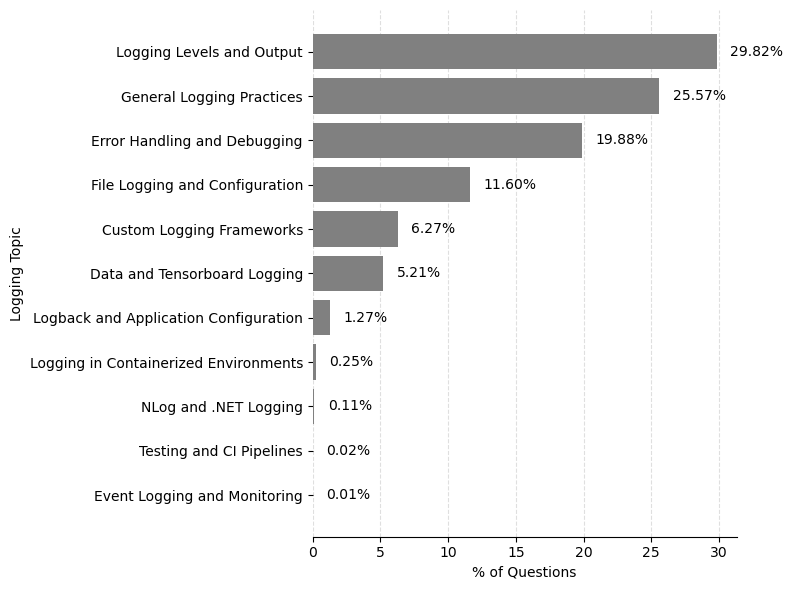

In [58]:
plot_horizontal_percentage(topic_freq_df)

In [64]:
df_logging_with_topic[["Id","Title","Body","topic_name"]].to_csv("logging_with_topic.csv")

In [63]:
df_logging_with_topic

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense,topic_name
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7.0,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0.0,0,NaN,NaN,NaN,CC BY-SA 4.0,Custom Logging Frameworks
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17.0,<p>I have one Java class that is multithreaded...,2395365.0,...,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0,Logging Levels and Output
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10.0,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0,Custom Logging Frameworks
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23.0,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0,Error Handling and Debugging
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24.0,<p>I want to be able to set python logging lev...,17285857.0,...,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1.0,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0,Logging Levels and Output
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75513,73730972,1,73732340.0,NaN,2022-09-15 12:15:29,NaN,6,5052.0,<p>I am using <code>zerolog</code> package in ...,974155.0,...,2022-09-15 13:48:18,zerolog with stdout and file logger adds addit...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0,Logging Levels and Output
75514,76851520,1,76851955.0,NaN,2023-08-07 12:04:59,NaN,4,2112.0,<p>In my Go app I moved error logging into a s...,19698303.0,...,2023-08-24 05:50:16,How do I test that zerolog logger raised log e...,<unit-testing><go><zerolog>,2.0,0,NaN,NaN,NaN,CC BY-SA 4.0,Logging Levels and Output
75515,77823971,1,77824252.0,NaN,2024-01-16 07:06:56,NaN,1,528.0,<p>i'm using zerolog for logging and got compl...,10262783.0,...,2024-01-16 10:17:16,Change position level and timestamp zerolog go...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0,Logging Levels and Output
75516,77824746,1,NaN,NaN,2024-01-16 09:41:57,NaN,2,471.0,<p>I wrote a code for integrating Azure app in...,9435629.0,...,2024-01-16 13:10:56,How to extract the zerolog event fields in the...,<azure><go><azure-application-insights><distri...,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0,Custom Logging Frameworks


In [65]:
avg_results_df

,topic_name,FavoriteCount,ViewCount,Score
0,Custom Logging Frameworks,0.0,3549.414588,3.380761
1,Data and Tensorboard Logging,0.0,2734.065173,2.131773
2,Error Handling and Debugging,0.0,4375.352992,2.656494
3,Event Logging and Monitoring,0.0,390.714286,0.571429
4,File Logging and Configuration,0.0,4565.924043,3.231525
5,General Logging Practices,0.0,3851.927047,3.958502
6,Logback and Application Configuration,0.0,5021.300728,2.859521
7,Logging Levels and Output,0.0,4832.152206,4.463770
8,Logging in Containerized Environments,0.0,7614.973118,6.430108
9,NLog and .NET Logging,0.0,2855.104651,1.802326


In [66]:
unanswered_accepted_stats_df

,topic_name,UnansweredAccepted_Count,Total_Count,UnansweredAccepted_Percentage
0,Custom Logging Frameworks,2392,4730,50.570825
1,Data and Tensorboard Logging,2280,3931,58.000509
2,Error Handling and Debugging,8733,15007,58.192843
3,Event Logging and Monitoring,4,7,57.142857
4,File Logging and Configuration,4980,8755,56.881782
5,General Logging Practices,9568,19302,49.569993
6,Logback and Application Configuration,583,961,60.665973
7,Logging Levels and Output,11791,22509,52.383491
8,Logging in Containerized Environments,120,186,64.516129
9,NLog and .NET Logging,45,86,52.325581


In [129]:
def draw_bubble_plot(df_views, df_unanswered):
    # Merge the dataframes on 'topic_name'
    df = pd.merge(df_views, df_unanswered, on='topic_name')
    
    # Setting the size of the plot
    plt.figure(figsize=(16, 12))
    
    # Creating the scatter plot
    bubble_size = df['ViewCount'] / df['ViewCount'].max() * 10000  # Normalizing the size of bubbles
    scatter = plt.scatter(df['UnansweredAccepted_Percentage'], df['ViewCount'], 
                          s=bubble_size, alpha=0.7, c=pd.factorize(df['topic_name'])[0], cmap='viridis', edgecolor='black')
    
    # Adding titles and labels with larger fonts
    plt.xlabel('Difficulty (% with no Accepted Answers)', fontsize=18)
    plt.ylabel('Popularity (Avg. Views)', fontsize=18)
#     plt.title('Bubble Plot of Topic Popularity and Difficulty', fontsize=20)
    
    # Enlarging the tick labels
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Adding annotations for each bubble
#     for i, txt in enumerate(df['topic_name']):
#         plt.annotate(txt, (df['UnansweredAccepted_Percentage'][i], df['ViewCount'][i]), textcoords="offset points", xytext=(0,10), ha='left')

    # Drawing mean lines for X and Y
    mean_difficulty = df['UnansweredAccepted_Percentage'].mean()
    mean_popularity = df['ViewCount'].mean()
    plt.axvline(x=mean_difficulty, color='r', linestyle='--', label=f'Mean Difficulty: {mean_difficulty:.2f}%')
    plt.axhline(y=mean_popularity, color='b', linestyle='--', label=f'Mean Popularity: {mean_popularity:.2f} views')

    # Adding a legend for the color categories
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#     legend_labels = {i: df['topic_name'][i] for i in range(len(df['topic_name']))}
#     legend2 = plt.legend(handles, [legend_labels[i] for i, _ in enumerate(handles)], loc="upper right", title="Topics")
#     plt.legend(title='Mean Lines', loc='lower right')
#     plt.gca().add_artist(legend2)

    # Improve grid visibility
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save the plot as a PDF
    plt.savefig('bubble_plot2.pdf')
    
    # Show the plot
    plt.show()

# Example dataframes to call the function
df_views = pd.DataFrame({
    'topic_name': ["Custom Logging Frameworks", "Data and Tensorboard Logging", "Error Handling and Debugging",
                   "Event Logging and Monitoring", "File Logging and Configuration", "General Logging Practices",
                   "Logback and Application Configuration", "Logging Levels and Output", "Logging in Containerized Environments",
                   "NLog and .NET Logging", "Testing and CI Pipelines"],
    'ViewCount': [3549.414588, 2734.065173, 4375.352992, 390.714286, 4565.924043, 3851.927047,
                  5021.300728, 4832.152206, 7614.973118, 2855.104651, 2402.117647]
})

df_unanswered = pd.DataFrame({
    'topic_name': ["Custom Logging Frameworks", "Data and Tensorboard Logging", "Error Handling and Debugging",
                   "Event Logging and Monitoring", "File Logging and Configuration", "General Logging Practices",
                   "Logback and Application Configuration", "Logging Levels and Output", "Logging in Containerized Environments",
                   "NLog and .NET Logging", "Testing and CI Pipelines"],
    'UnansweredAccepted_Percentage': [50.570825, 58.000509, 58.192843, 57.142857, 56.881782, 49.569993,
                                      60.665973, 52.383491, 64.516129, 52.325581, 58.823529]
})
# draw_bubble_plot(df_views, df_unanswered)  # Call the function with the sample data


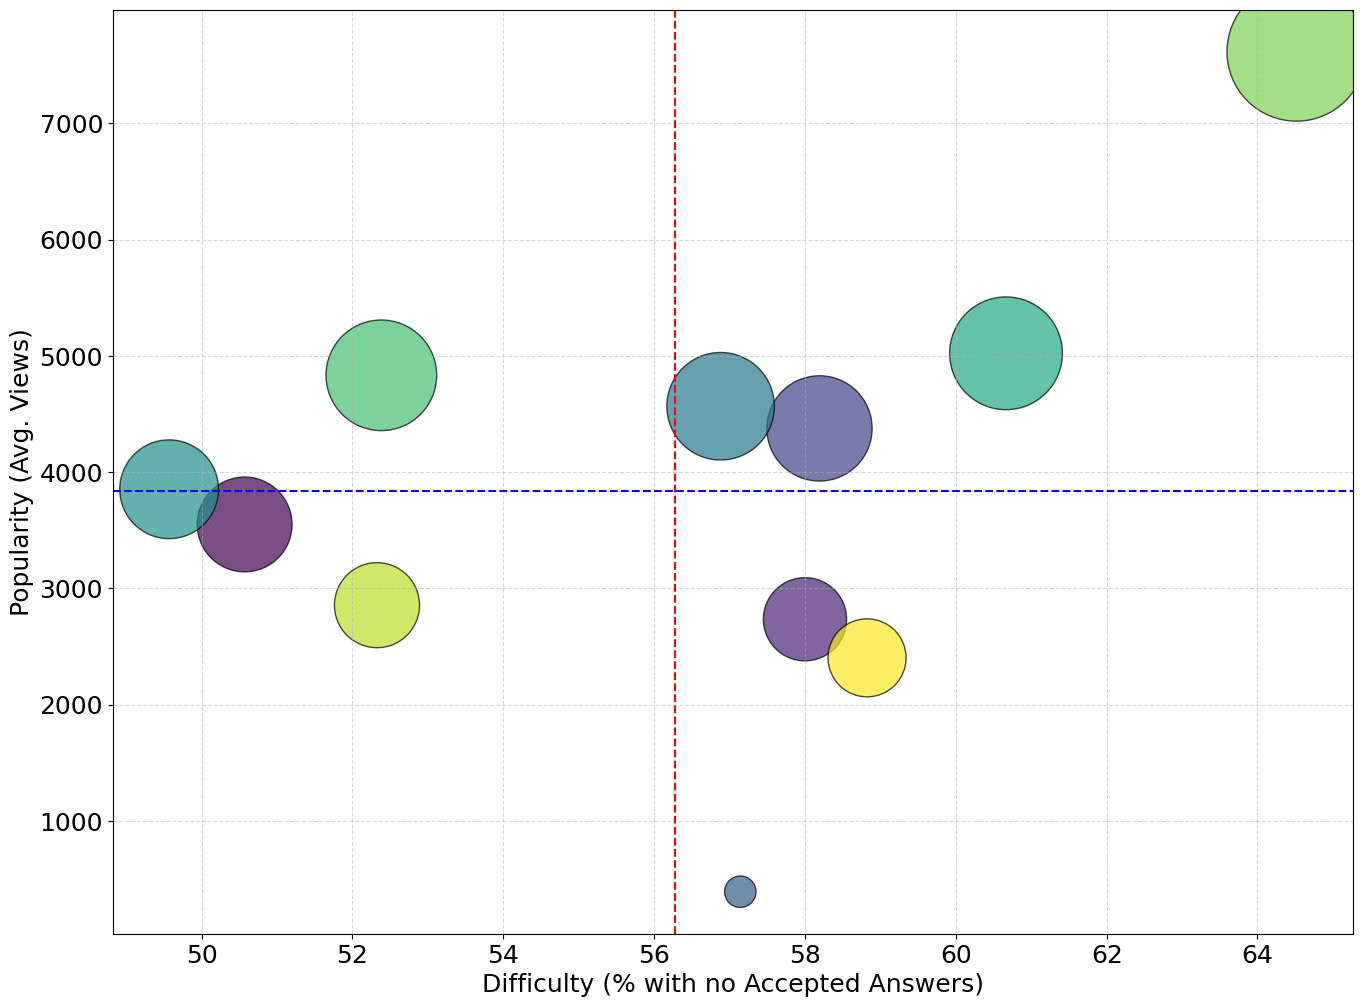

In [130]:
# Drawing the bubble plot
draw_bubble_plot(df_views, df_unanswered)